In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("shopping_trends.csv")

About data 

In [3]:
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
print('columns with numeric data')
print(df.select_dtypes(include='number').columns.tolist())
print('columns with non numerica data')
print(df.select_dtypes(exclude='number').columns.tolist())

columns with numeric data
['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
columns with non numerica data
['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']


In [8]:
df.rename(columns= {'Purchase Amount (USD)':'Amount'},inplace=True)

In [9]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Amount                      0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

# Exploratory data analysis

In [10]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

Gender

<Axes: xlabel='Gender', ylabel='count'>

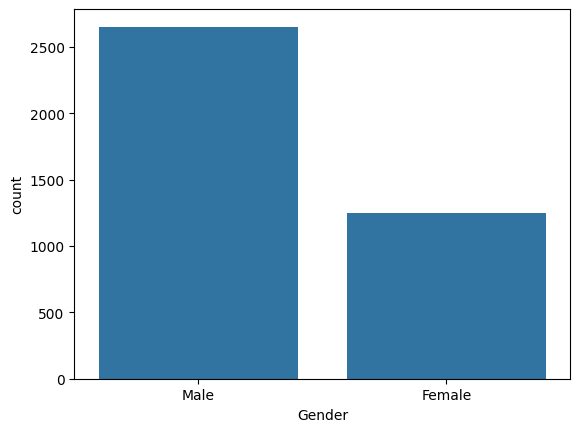

In [11]:
sns.countplot(x = 'Gender', data=df)

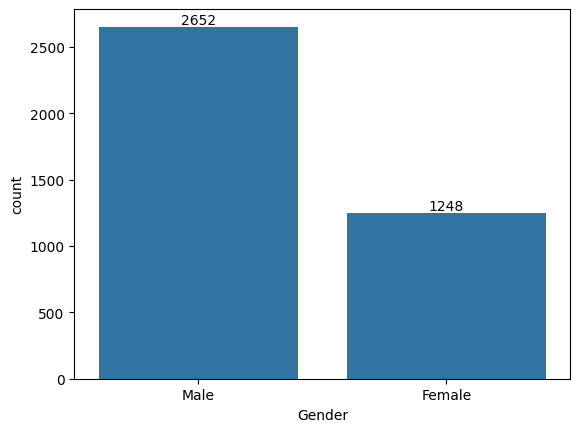

In [12]:
ax = sns.countplot(x='Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [13]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
1,Male,157890
0,Female,75191


<Axes: xlabel='Gender', ylabel='Amount'>

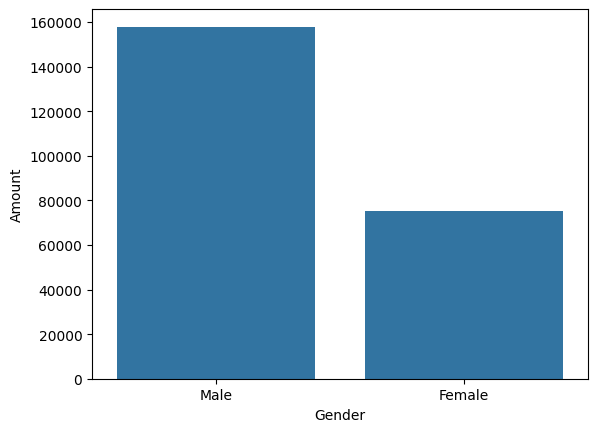

In [14]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount', data=sales_gen)

From above graphs we can see that most of the buyers are males and even the purchasing power of males are greater than female.


According to Age

In [15]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Age', ylabel='count'>

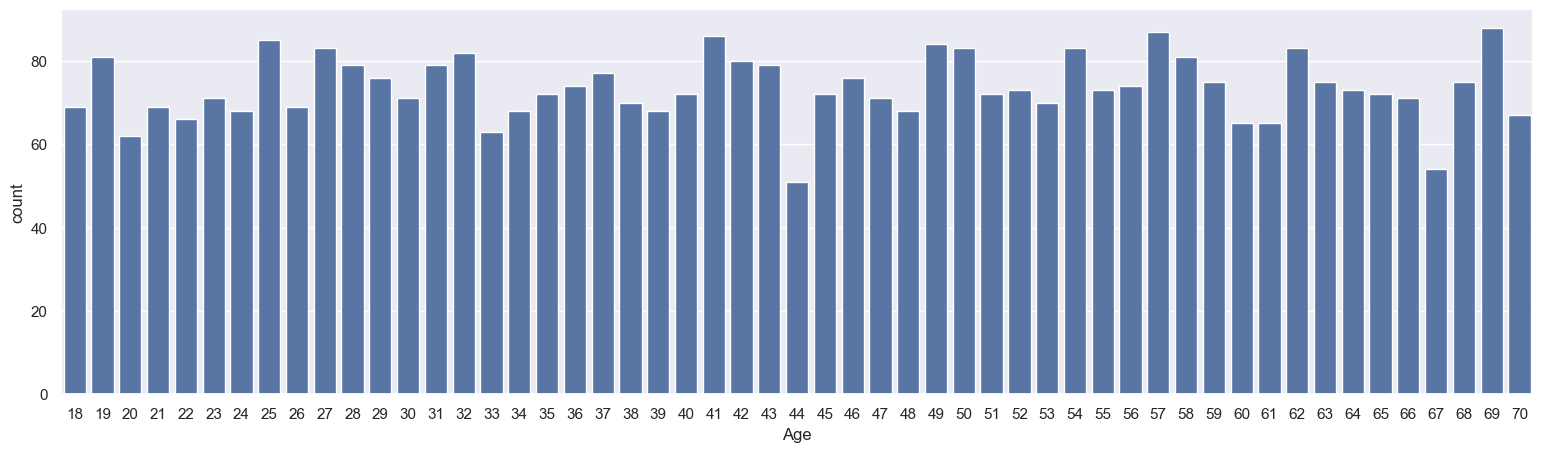

In [16]:
sns.set(rc={'figure.figsize':(19,5)})

sns.countplot(x='Age', data=df)

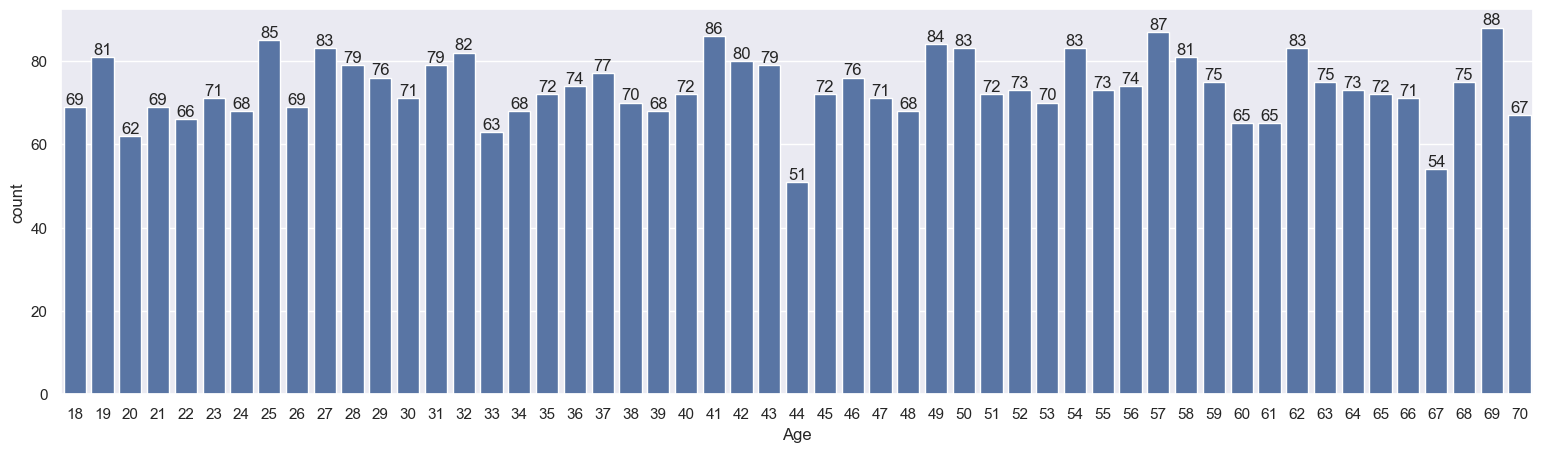

In [17]:
ax = sns.countplot(x='Age', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [18]:
df.groupby(['Age'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Age,Amount
31,49,5552
51,69,5484
7,25,5372
23,41,5282
36,54,5282
39,57,5200
10,28,5104
1,19,4941
32,50,4930
13,31,4864


<Axes: xlabel='Age', ylabel='Amount'>

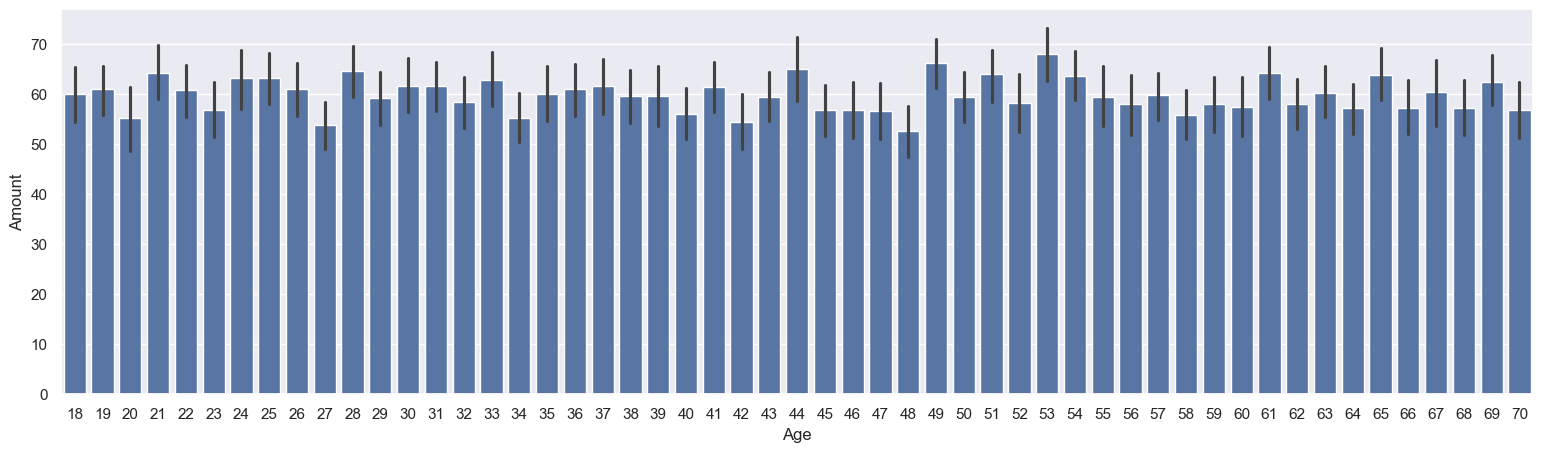

In [19]:
sales_gen = df.groupby(['Age'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age', y = 'Amount', data=df)

Above graph show that age no. 67 have more purchase. And age 53 have more purchasing in the term of money

Item Purchased

In [20]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Item Purchased', ylabel='count'>

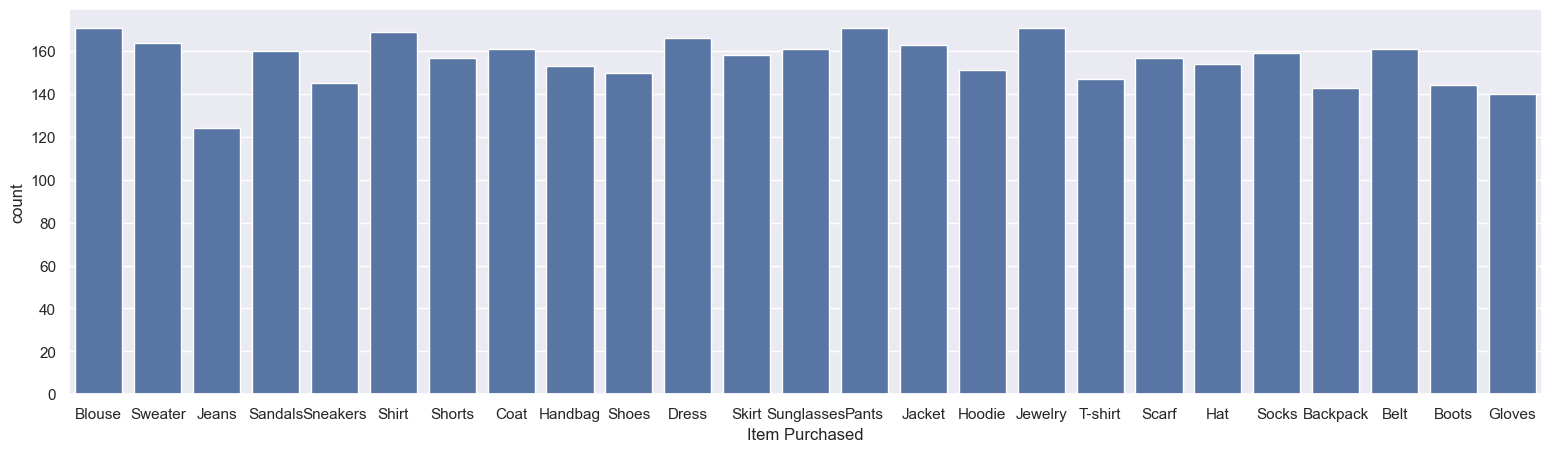

In [21]:
sns.countplot(x='Item Purchased', data=df)

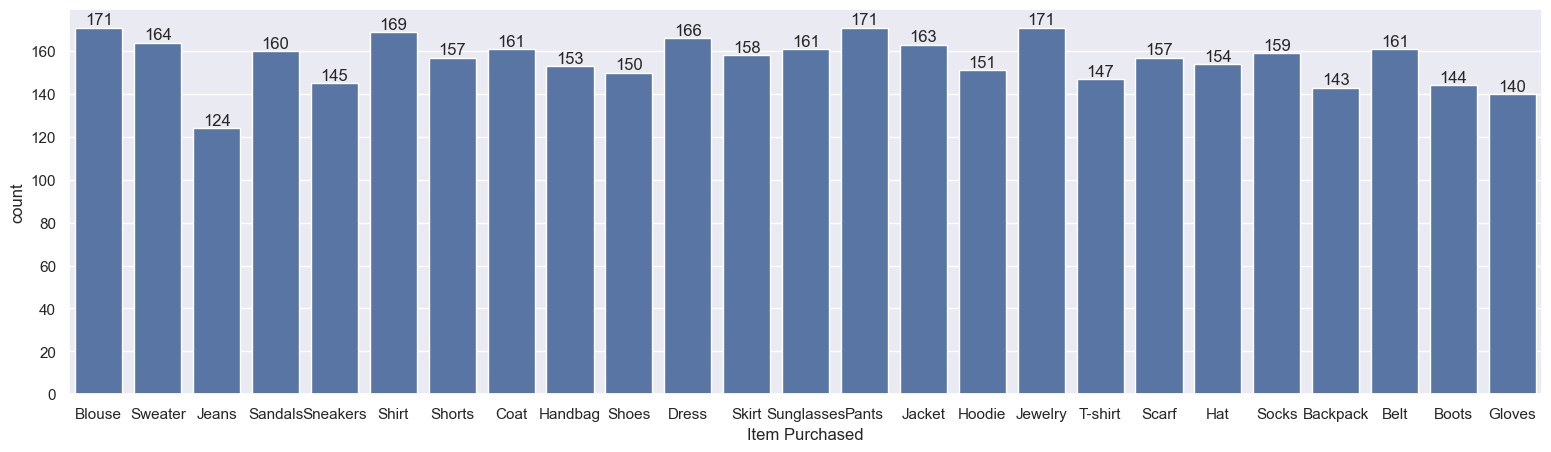

In [22]:
ax = sns.countplot(x='Item Purchased', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [23]:
df.groupby(['Item Purchased'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Item Purchased,Amount
2,Blouse,10410
16,Shirt,10332
5,Dress,10320
13,Pants,10090
12,Jewelry,10010
22,Sunglasses,9649
1,Belt,9635
15,Scarf,9561
23,Sweater,9462
18,Shorts,9433


<Axes: xlabel='Item Purchased', ylabel='Amount'>

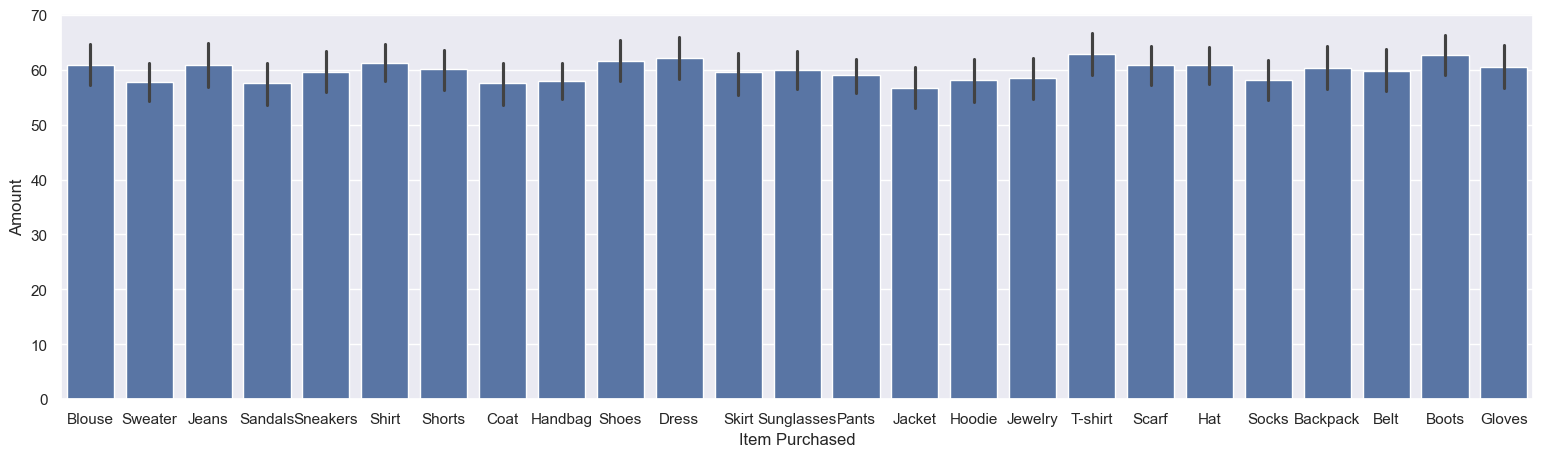

In [24]:
sales_gen = df.groupby(['Item Purchased'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Item Purchased', y = 'Amount', data=df)

from above graph we know that jewelry pants and blouse have more sale and t-shirt have more amount of sale

Category

In [25]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Category', ylabel='count'>

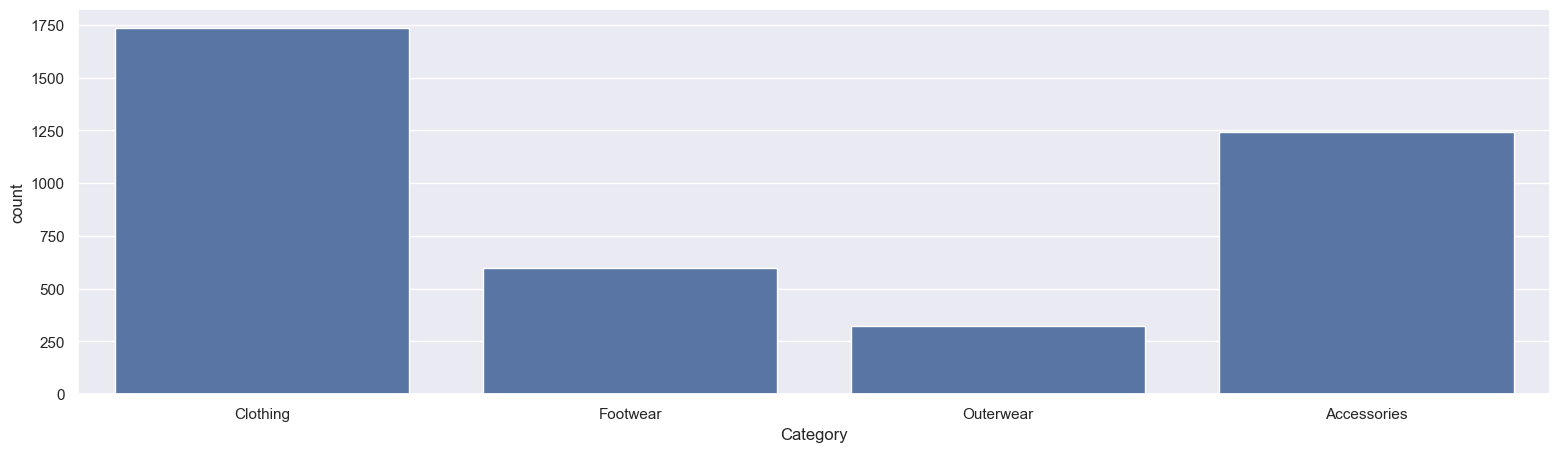

In [26]:
sns.countplot(x='Category', data=df)

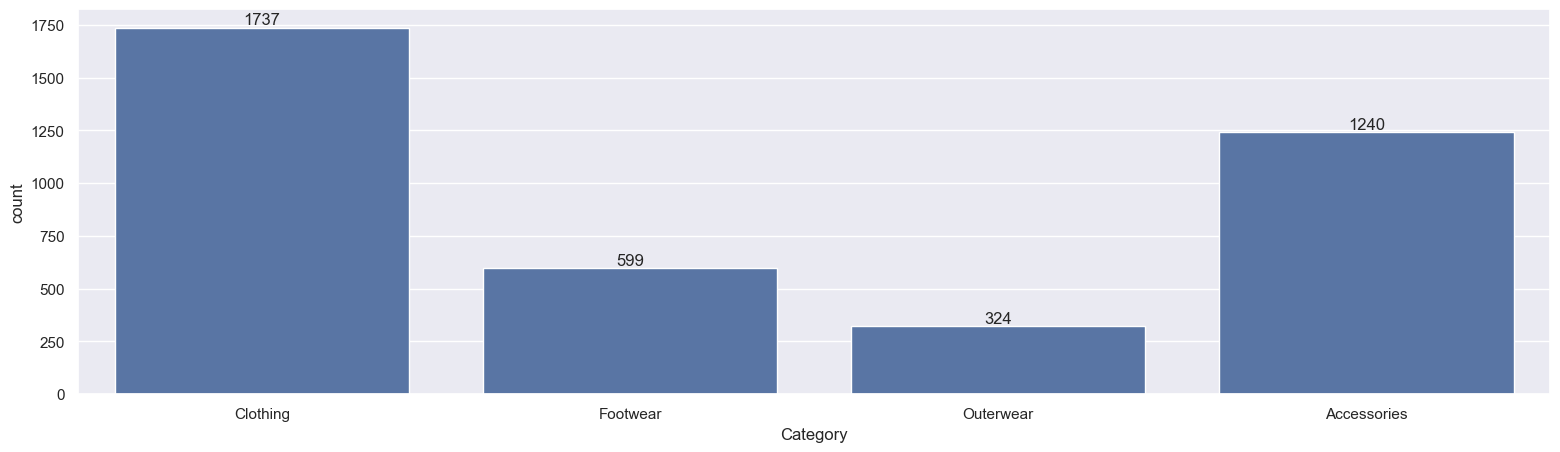

In [27]:
ax = sns.countplot(x='Category', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [28]:
df.groupby(['Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Category,Amount
1,Clothing,104264
0,Accessories,74200
2,Footwear,36093
3,Outerwear,18524


<Axes: xlabel='Category', ylabel='Amount'>

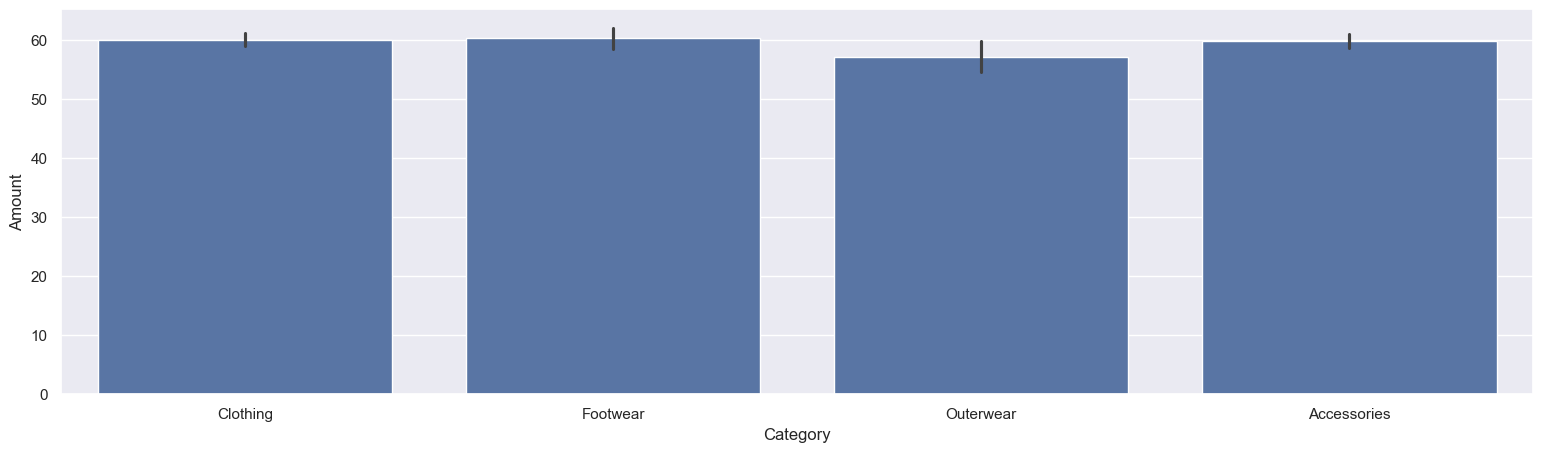

In [29]:
sales_gen = df.groupby(['Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Category', y = 'Amount', data=df)

from the above graph we know that clothing categories have more sell and clothing have more amount of sale.

size

In [30]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Size', ylabel='count'>

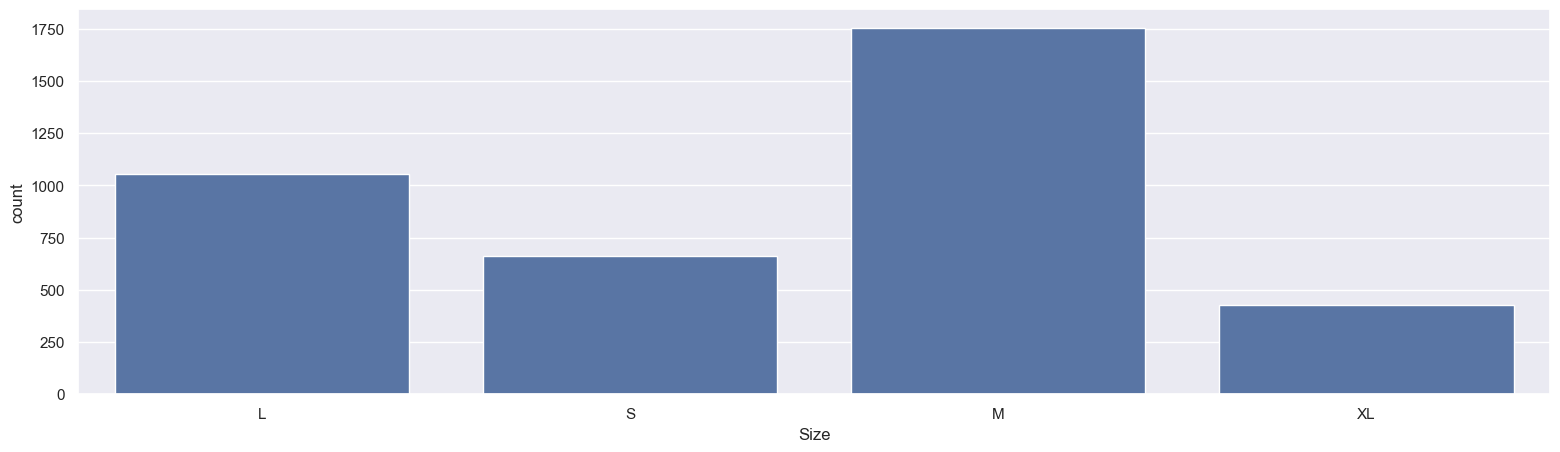

In [31]:
sns.countplot(x='Size', data=df)

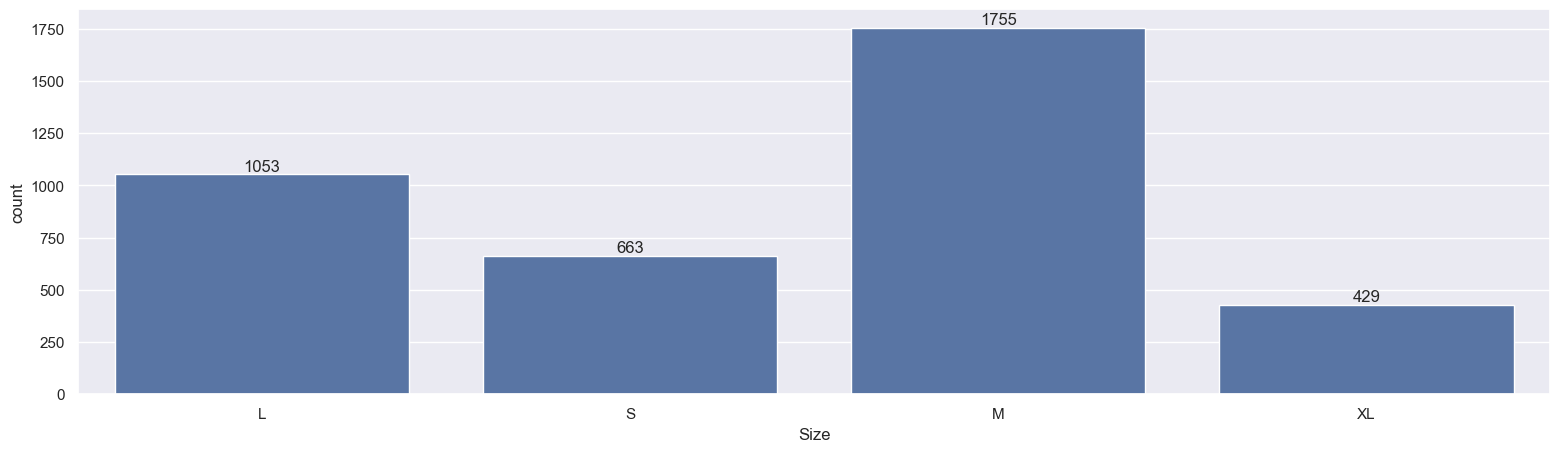

In [32]:
ax = sns.countplot(x='Size', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [33]:
df.groupby(['Size'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Size,Amount
1,M,105167
0,L,61667
2,S,40468
3,XL,25779


<Axes: xlabel='Size', ylabel='Amount'>

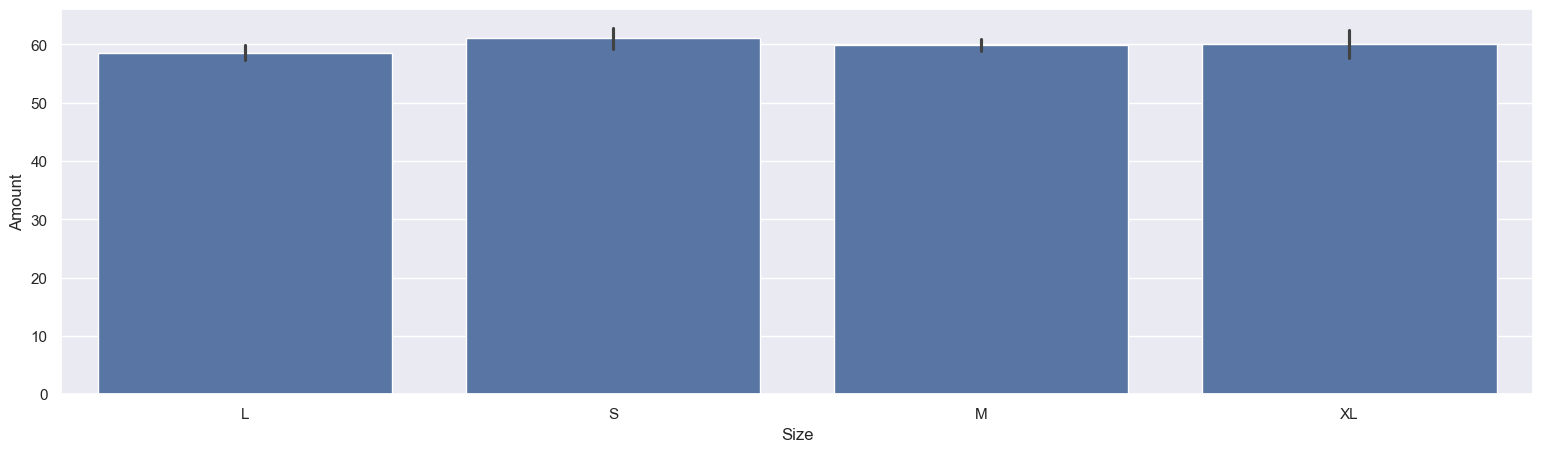

In [34]:
sales_gen = df.groupby(['Size'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Size', y='Amount', data=df)

from the above graph we can know that medium size is sell more and also in term of money the medium size is sell more

Color

In [35]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Color', ylabel='count'>

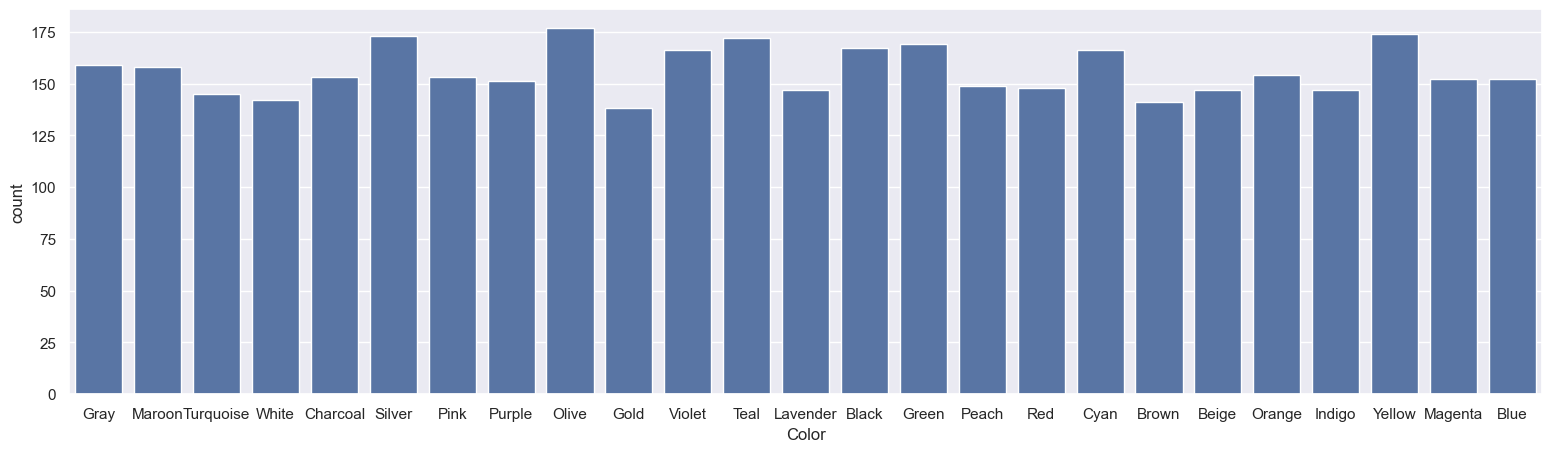

In [36]:
sns.countplot(x='Color', data=df)

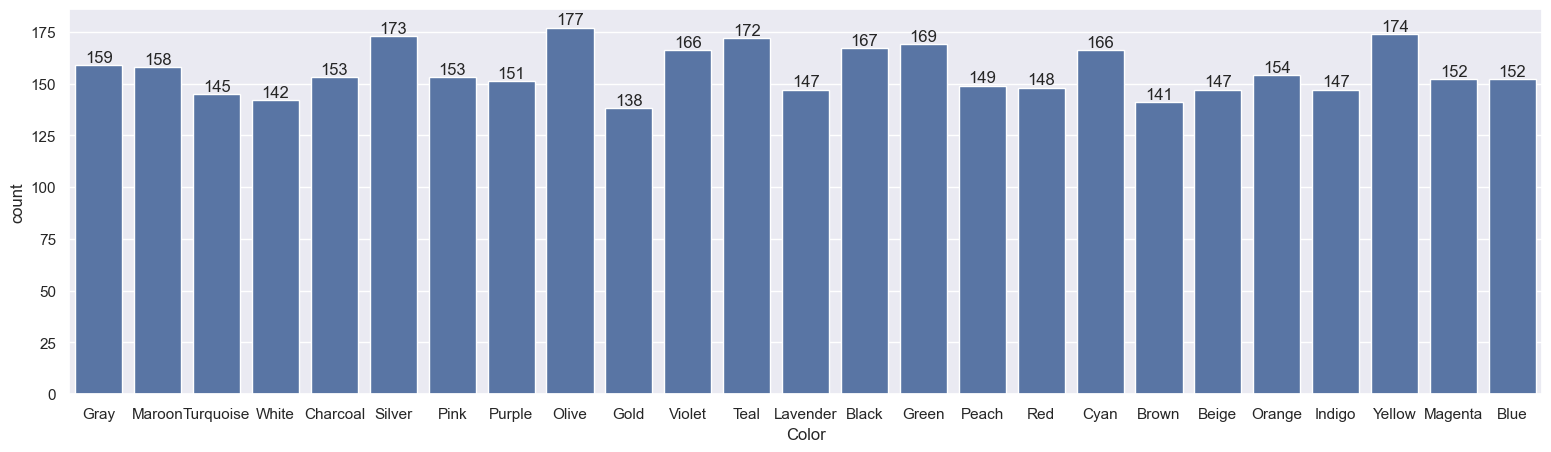

In [37]:
ax = sns.countplot(x='Color', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [38]:
df.groupby(['Color'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Color,Amount
8,Green,11104
20,Teal,10459
24,Yellow,10308
13,Olive,10292
5,Cyan,10274
22,Violet,10245
7,Gray,9936
19,Silver,9832
1,Black,9753
12,Maroon,9405


<Axes: xlabel='Color', ylabel='Amount'>

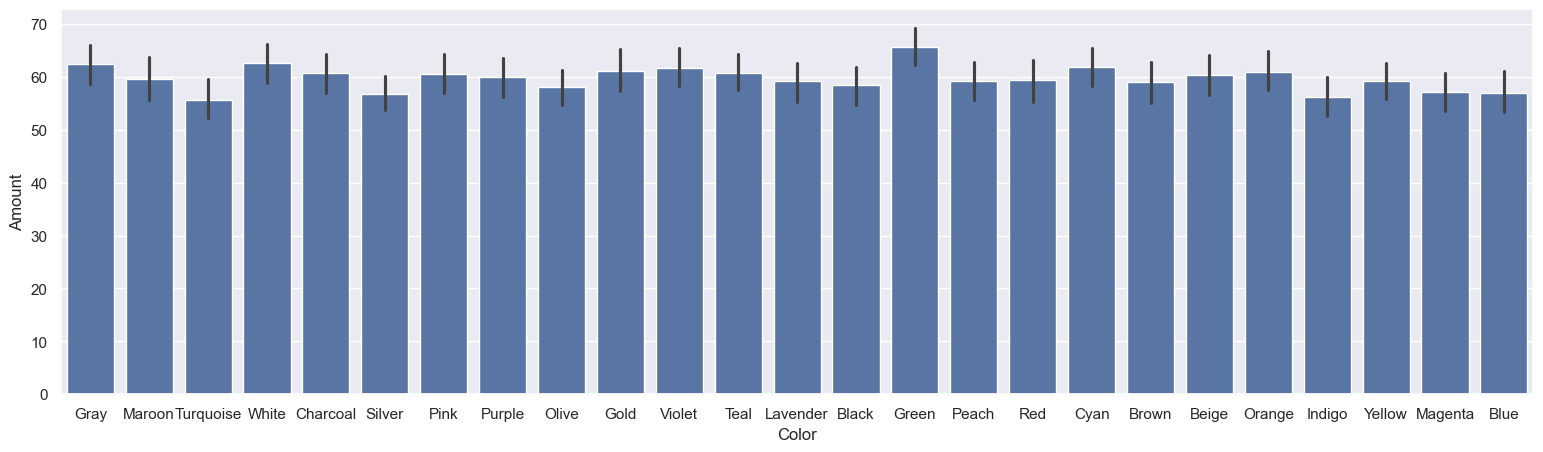

In [39]:
sales_gen = df.groupby(['Color'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Color', y='Amount', data=df)

from the above graph olive is the most sell color and green is most in the term in amount.

Season.

In [40]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Season', ylabel='count'>

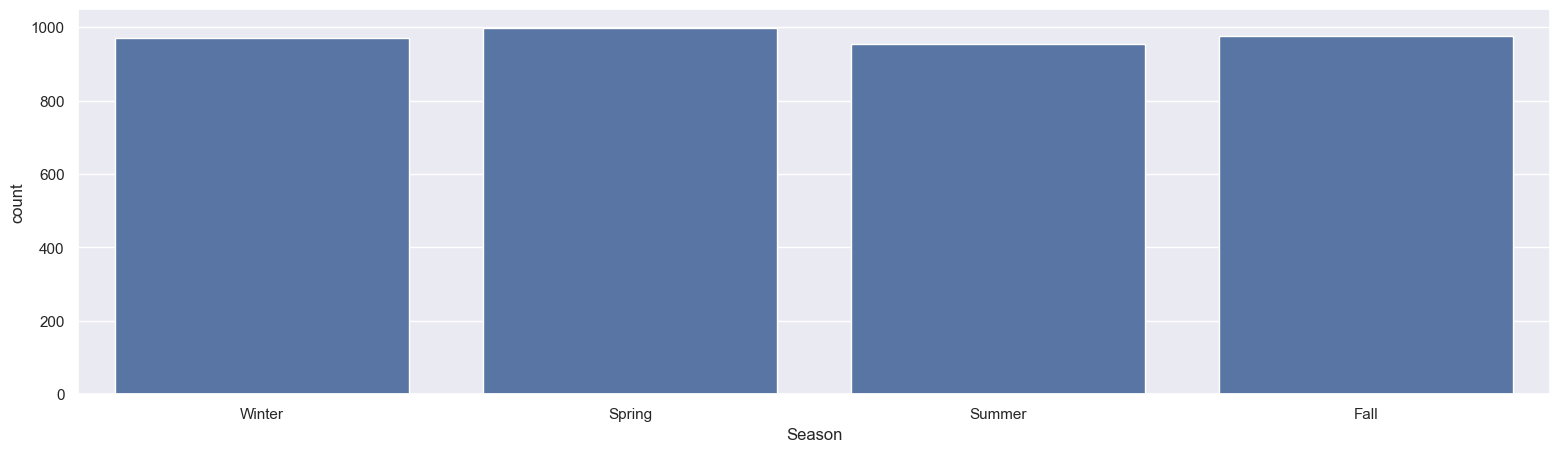

In [41]:
sns.countplot(x='Season', data=df)

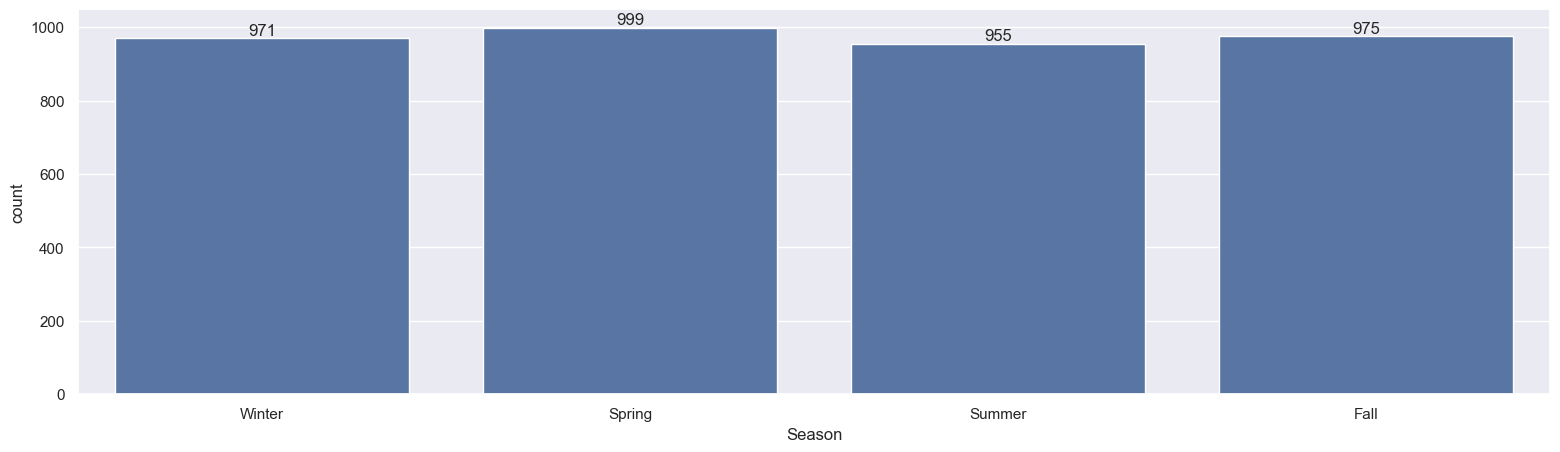

In [42]:
ax = sns.countplot(x='Season', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [43]:
df.groupby(['Season'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Season,Amount
0,Fall,60018
1,Spring,58679
3,Winter,58607
2,Summer,55777


<Axes: xlabel='Season', ylabel='Amount'>

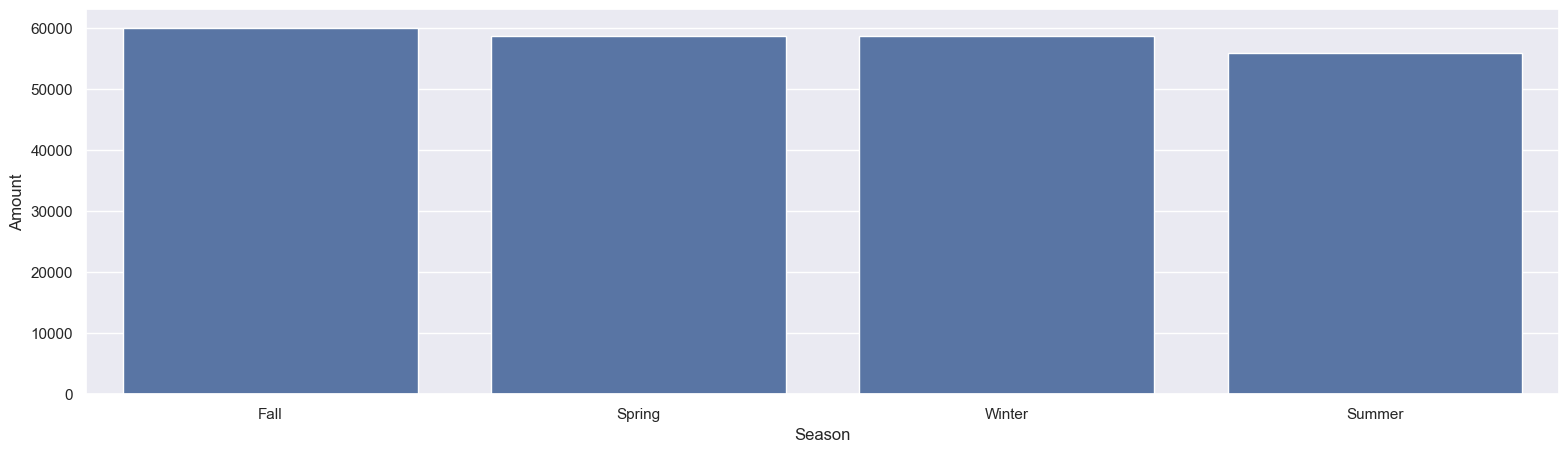

In [44]:
sales_gen = df.groupby(['Season'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Season', y='Amount', data=sales_gen)

from the above graph we know that maximum sale is in spring but in trem of amount it is in Fall.

Review Rating

In [45]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Review Rating', ylabel='count'>

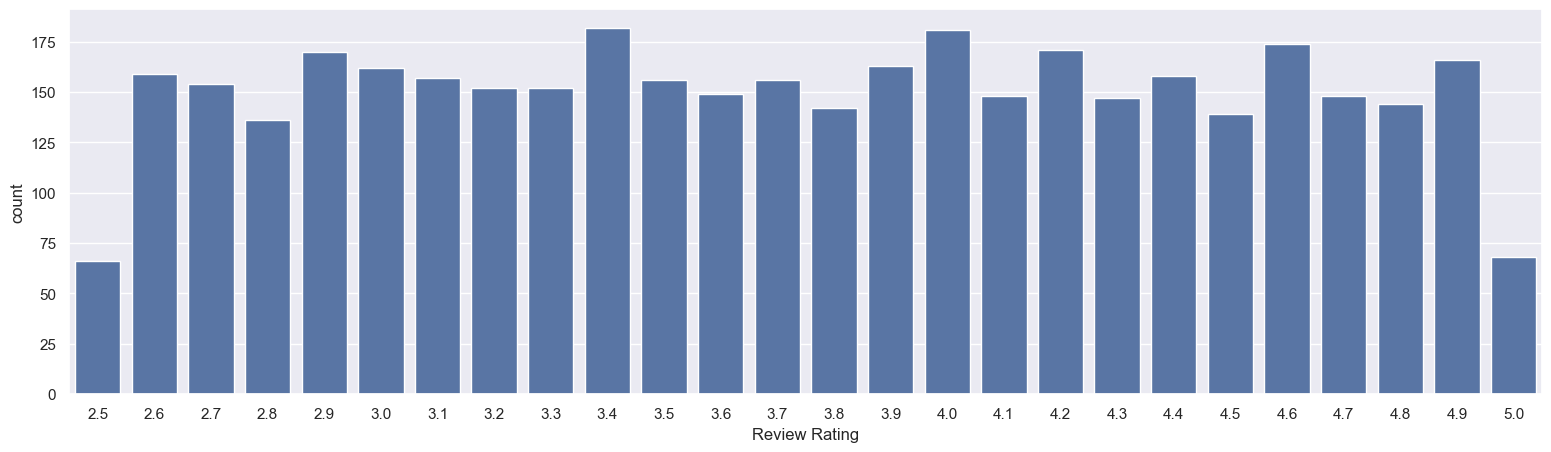

In [46]:
sns.countplot(x='Review Rating', data=df)

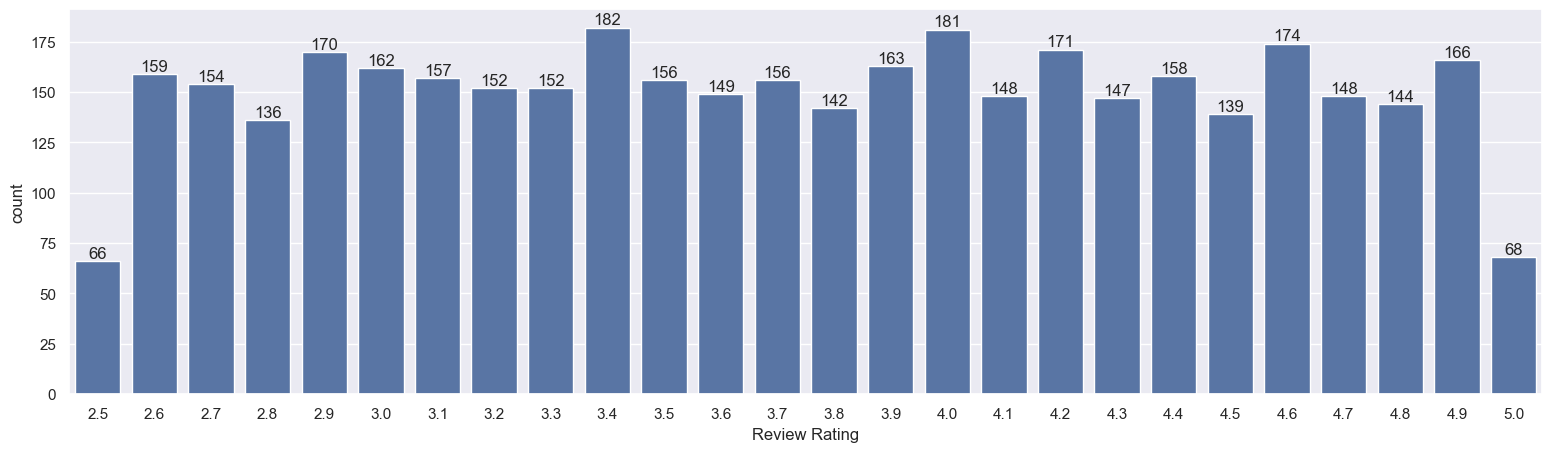

In [47]:
am = sns.countplot(x='Review Rating', data=df)
for bars in am.containers:
    am.bar_label(bars)

In [48]:
df.groupby(['Review Rating'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)


,Review Rating,Amount
9,3.4,10739
15,4.0,10722
24,4.9,10605
17,4.2,10406
21,4.6,10037
5,3.0,9838
14,3.9,9605
4,2.9,9600
19,4.4,9563
1,2.6,9471


<Axes: xlabel='Review Rating', ylabel='Amount'>

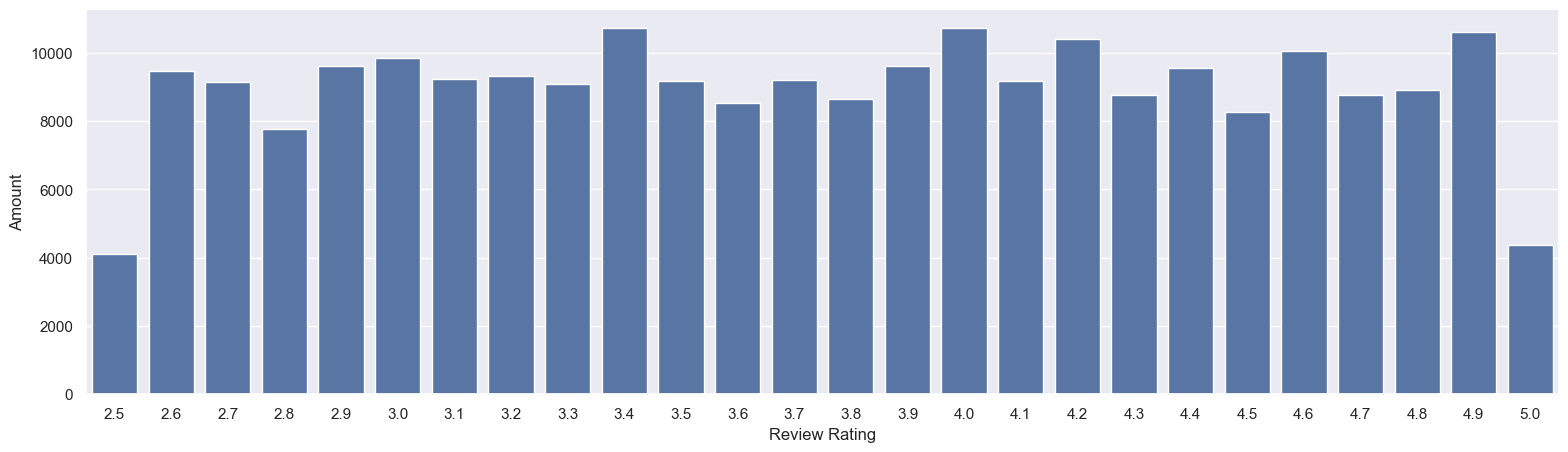

In [49]:
sales_gen = df.groupby(['Review Rating'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Review Rating', y='Amount', data=sales_gen)

from the above graph 3.4 is more rating and also in the term of amount 3.4 is the most rating

In [50]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Subscription Status', ylabel='count'>

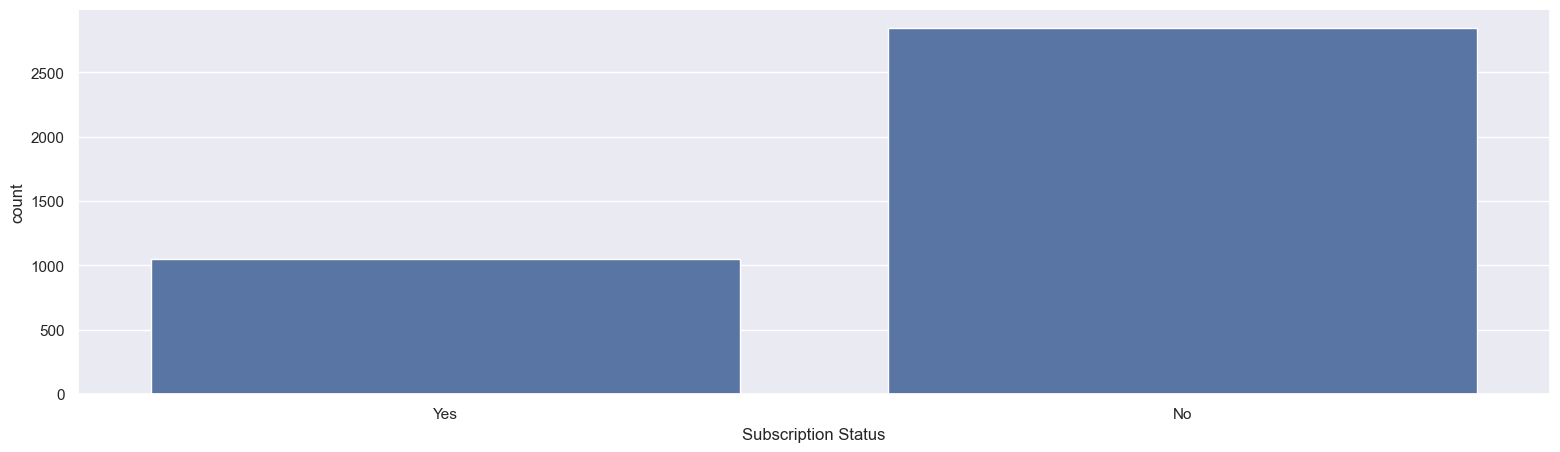

In [51]:
sns.countplot(x='Subscription Status', data=df)

In [52]:
df.groupby(['Subscription Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Subscription Status,Amount
0,No,170436
1,Yes,62645


<Axes: xlabel='Subscription Status', ylabel='Amount'>

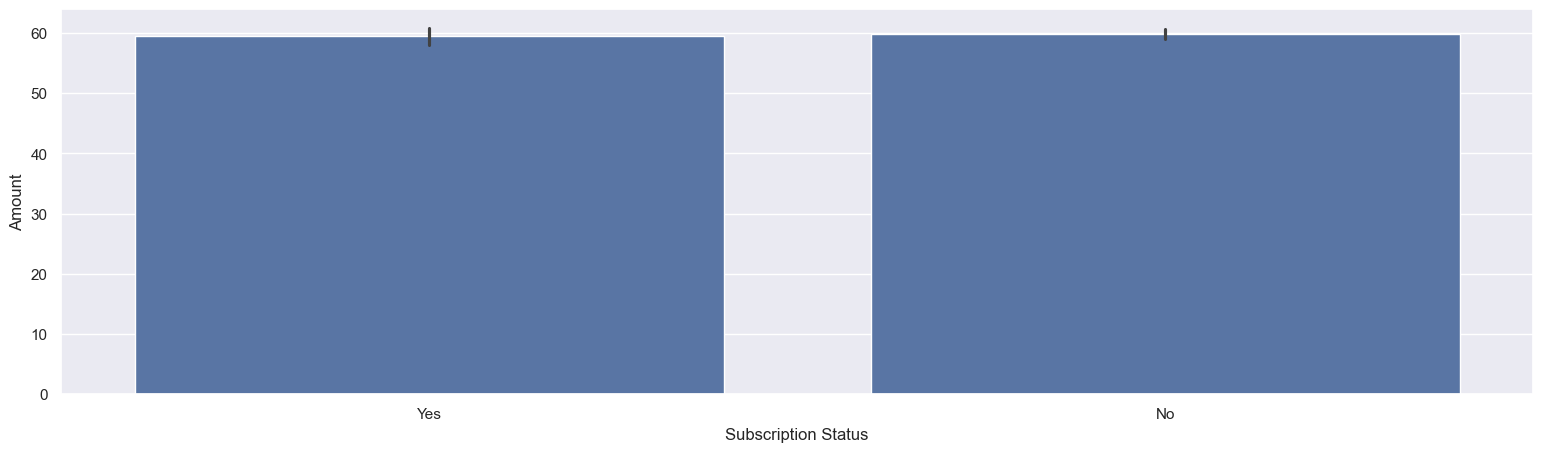

In [53]:
sales_gen = df.groupby(['Subscription Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x= 'Subscription Status', y = 'Amount', data=df)

From above graphs we can see that most of the buyers have no subscription and even the purchasing power of non-subscription are greater than subscription.

# with the help of data we plotted some graph and analysing the data and we found some important data which can be used in future.
1. From above graphs we can see that most of the buyers are males and even the purchasing power of males are greater than female.
2. Above graph show that age no. 67 have more purchase. And age 53 have more purchasing in the term of money.
3. From above graph we know that jewelry pants and blouse have more sale and t-shirt have more amount of sale.
4. From the above graph we know that clothing categories have more sell and clothing have more amount of sale.
5. From the above graph we can know that medium size is sell more and also in term of money the medium size is sell more.
6. From the above graph olive is the most sell color and green is most in the term in amount.
7. From the above graph we know that maximum sale is in spring but in trem of amount it is in Fall.
8. From the above graph 3.4 is more rating and also in the term of amount 3.4 is the most rating.
9. From above graphs we can see that most of the buyers have no subscription and even the purchasing power of non-subscription are greater than subscription.
